In [ ]:
import pandas as pd

# Chargement
df = pd.read_csv("/content/dataset_irrigation_synthetique.csv")

In [ ]:
df.head()

,temperature_air,temperature_sol,humidite_air,humidite_sol,ph_eau,debit_eau,conductivite_eau,luminosite,besoin_irrigation
0,27.483571,20.881202,49.822579,37.131536,6.674143,1.071016,1.286952,188.973891,2
1,24.308678,20.732929,55.417508,39.346882,6.641662,1.990146,0.842401,173.879682,2
2,28.238443,14.021784,51.039284,41.285898,6.031740,0.284262,0.954300,713.398847,2
3,32.615149,21.349549,61.656271,58.937229,6.789792,1.724453,1.477001,711.930462,1
4,23.829233,26.664145,77.957678,25.055654,5.754959,0.994406,1.763070,530.773761,3


In [ ]:
colonnes_features = ['temperature_sol', 'temperature_air', 'humidite_sol', 'humidite_air', 'luminosite']
cible = 'besoin_irrigation'

# Sélection des features
X = df[colonnes_features]
y = df[cible]

# Vérification rapide
print(X.head())
print(y.value_counts())

   temperature_sol  temperature_air  humidite_sol  humidite_air  luminosite
0        20.881202        27.483571     37.131536     49.822579  188.973891
1        20.732929        24.308678     39.346882     55.417508  173.879682
2        14.021784        28.238443     41.285898     51.039284  713.398847
3        21.349549        32.615149     58.937229     61.656271  711.930462
4        26.664145        23.829233     25.055654     77.957678  530.773761
besoin_irrigation
2    1891
3    1534
1    1221
0     354
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Split train/test stratifié
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Prédiction
y_pred = clf.predict(X_test_scaled)

# Rapport classification
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       1.00      1.00      1.00       244
           2       1.00      1.00      1.00       378
           3       1.00      1.00      1.00       307

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



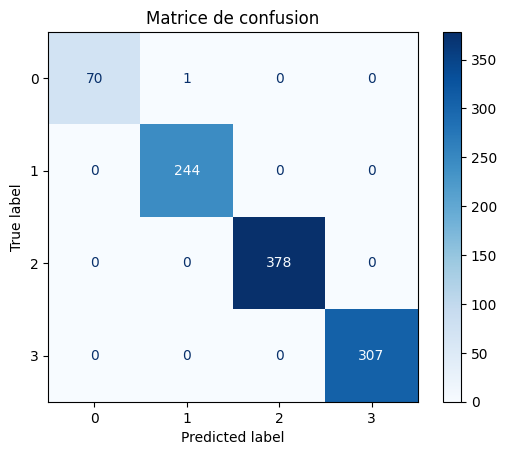

In [ ]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


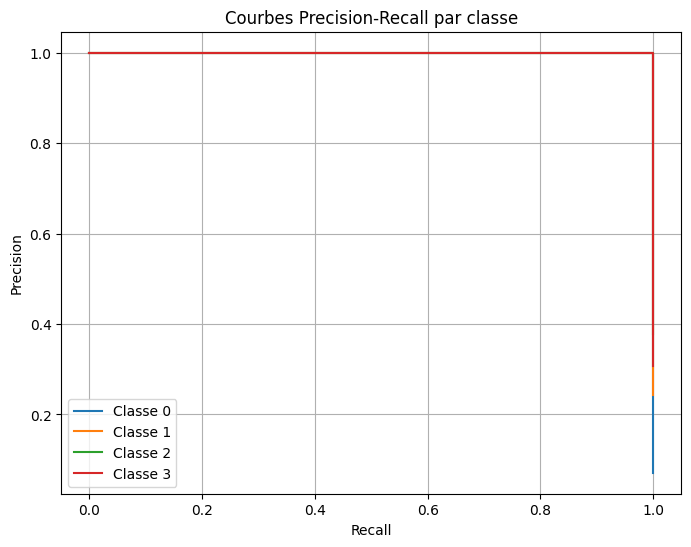

In [ ]:
# Courbes Precision-Recall
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=clf.classes_)
y_scores = clf.predict_proba(X_test_scaled)

plt.figure(figsize=(8,6))
for i in range(len(clf.classes_)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    plt.plot(recall, precision, label=f'Classe {clf.classes_[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbes Precision-Recall par classe')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Fonction recommandation adaptée à 5 features
def recommander_irrigation(input_features, model, scaler):

    import numpy as np
    input_array = np.array(input_features).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    classe = model.predict(input_scaled)[0]

    recommandations = {
        0: "Aucun besoin d'irrigation",
        1: "Irrigation légère recommandée",
        2: "Irrigation modérée recommandée",
        3: "Irrigation forte recommandée"
    }

    return recommandations[classe]


In [ ]:
donnees_test = [26.5, 30.2, 42.0, 55.0, 500]
print("🔔 Recommandation IA :", recommander_irrigation(donnees_test, clf, scaler))


🔔 Recommandation IA : Irrigation modérée recommandée


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib

# Après l'entraînement de votre modèle
joblib.dump(clf, 'model_irrigation.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']